Intro

Import packages and functions

In [2]:
# Reload functions every time
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, 'functions')


import queue_network_simulator as qns
import plotting_functions as pf


Simulation parameters

In [21]:
analysisID = "ECU_demo"
analysis_location = "data"

number_of_runs = 10
warm_up_duration = 40
sim_duration = 60

Read input

In [22]:
model_parameters = qns.read_input(analysisID,analysis_location)

model_parameters["capacities"]

{'ECU': 11, 'ITU': 32}

In [23]:
model_parameters["trajectories"]

{'traj1':   step service_time_distribution length_of_need
 0  ECU                 lognormal          6;0.6,
 'traj2':   step service_time_distribution length_of_need
 0  ITU                 lognormal          6;0.6,
 'traj3':   step service_time_distribution length_of_need
 0  ECU                 lognormal       0.6;0.06
 1  ITU                 lognormal       5.4;0.54,
 'traj4':   step service_time_distribution length_of_need
 0  ITU                 lognormal       5.4;0.54
 1  ECU                 lognormal       0.6;0.06,
 'traj5':   step service_time_distribution length_of_need
 0  ECU                 lognormal       0.6;0.06
 1  ITU                 lognormal       4.8;0.48
 2  ECU                 lognormal       0.6;0.06}

Run simulation

In [9]:
raw_data = {}


for r in range(number_of_runs):
    print (f"Run {r+1} of {number_of_runs}")
    my_model = qns.PathwayModel(r, model_parameters, warm_up_duration, sim_duration)
    my_model.run(r)
    raw_data[r+1] = my_model.output
    print()

Run 1 of 10

Run 2 of 10

Run 3 of 10

Run 4 of 10

Run 5 of 10

Run 6 of 10

Run 7 of 10

Run 8 of 10

Run 9 of 10

Run 10 of 10



Plot and save results

6.066333556977688


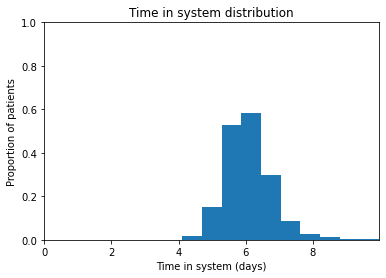

0.16273569476903924


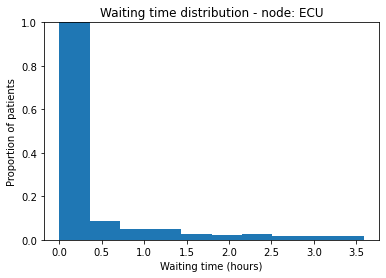

0.027475761100451204


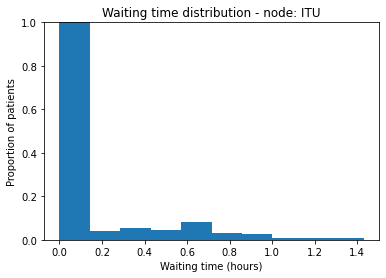

In [10]:

plot_from = warm_up_duration + 1
plot_to = warm_up_duration + sim_duration

time_transformation = 1


pf.plot_time_in_system(raw_data, plot_from, plot_to, analysisID, analysis_location, time_transformation)

for node_iter in my_model.node_ids:
    pf.plot_waiting_time(raw_data, node_iter, plot_from, plot_to, analysisID, analysis_location, time_transformation)




In [9]:
model_parameters

{'trajectories': {'traj1':      step service_time_distribution  length_of_need
  0  clinic               exponential               4},
 'node_ids': 0    clinic
 Name: step, dtype: object,
 'node_names': {'clinic': 'bed'},
 'capacities': {'clinic': 50},
 'node_cost_per_time': {'clinic': 1},
 'arrival_distribution': 'poisson',
 'arrival_distr_parameter': 12,
 'traj_prop': {'traj1': 1}}

In [11]:
raw_data

{1: <queue_network_simulator.Output at 0x2ce247627f0>,
 2: <queue_network_simulator.Output at 0x2ce23694550>,
 3: <queue_network_simulator.Output at 0x2ce2b1413d0>,
 4: <queue_network_simulator.Output at 0x2ce2b139b20>,
 5: <queue_network_simulator.Output at 0x2ce24f510d0>,
 6: <queue_network_simulator.Output at 0x2ce2b16fd90>,
 7: <queue_network_simulator.Output at 0x2ce2b182310>,
 8: <queue_network_simulator.Output at 0x2ce2b1759d0>,
 9: <queue_network_simulator.Output at 0x2ce2b145490>,
 10: <queue_network_simulator.Output at 0x2ce24f4fac0>}